# Kalorimetrie Küchentischversuch - Newtonsches Abkühlungsgesetz
Author: Paul Zuendel

Datum: 17.11.2023

Gruppe: 99

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Wie lautet der Transportkoeffizient des Wassers.

## Versuchsaufbau und Durchführung

Man gebe 300 ml, 60° heißes Wasser in eine Tasse und halte einen Sensor hinein. Den zweiten Sensor lässt man außerhalb des Behälters und misst die Umgebungstemperatur. Nun startet man die Messung und lässt diese für 10 min laufen.


![Veruschsaufbau](Versuch_Newton.jpg)

## Versuchsauswertung

In [2]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib
import h5py

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Newtonsches Abkühlungsgesetz

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [7]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

path_newton = "/home/jovyan/work/calorimetry_home/data/newton_zuendel.h5"

# DONE #

In [8]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.

with h5py.File(path_newton, 'r') as f:
    newton_data = f["RawData"]
    dataset_newton = {}
    
    for uuid_key in newton_data.keys():
        uuid_group = newton_data[uuid_key]
        
        attributes = dict(uuid_group.attrs)
        
        temp_data = uuid_group['temperature'][:]
        time_data = uuid_group['time'][:]
        
        dataset_newton[uuid_key] = {
            'attributes': attributes,
            'temperature': temp_data,
            'time': time_data
        }
        
# DONE #

#### (ii) Daten Semi–log ploten

Die Zeit und Differenz zwischen der heißen Flüssigkeit und der Umgebungstemperatur wird aufgezeichnet.

Die y-Achse (Temperaturdifferenz) ist auf logarithmisch eingestellt und die x-Achse (Zeit) verwendet eine normale Skalierung.

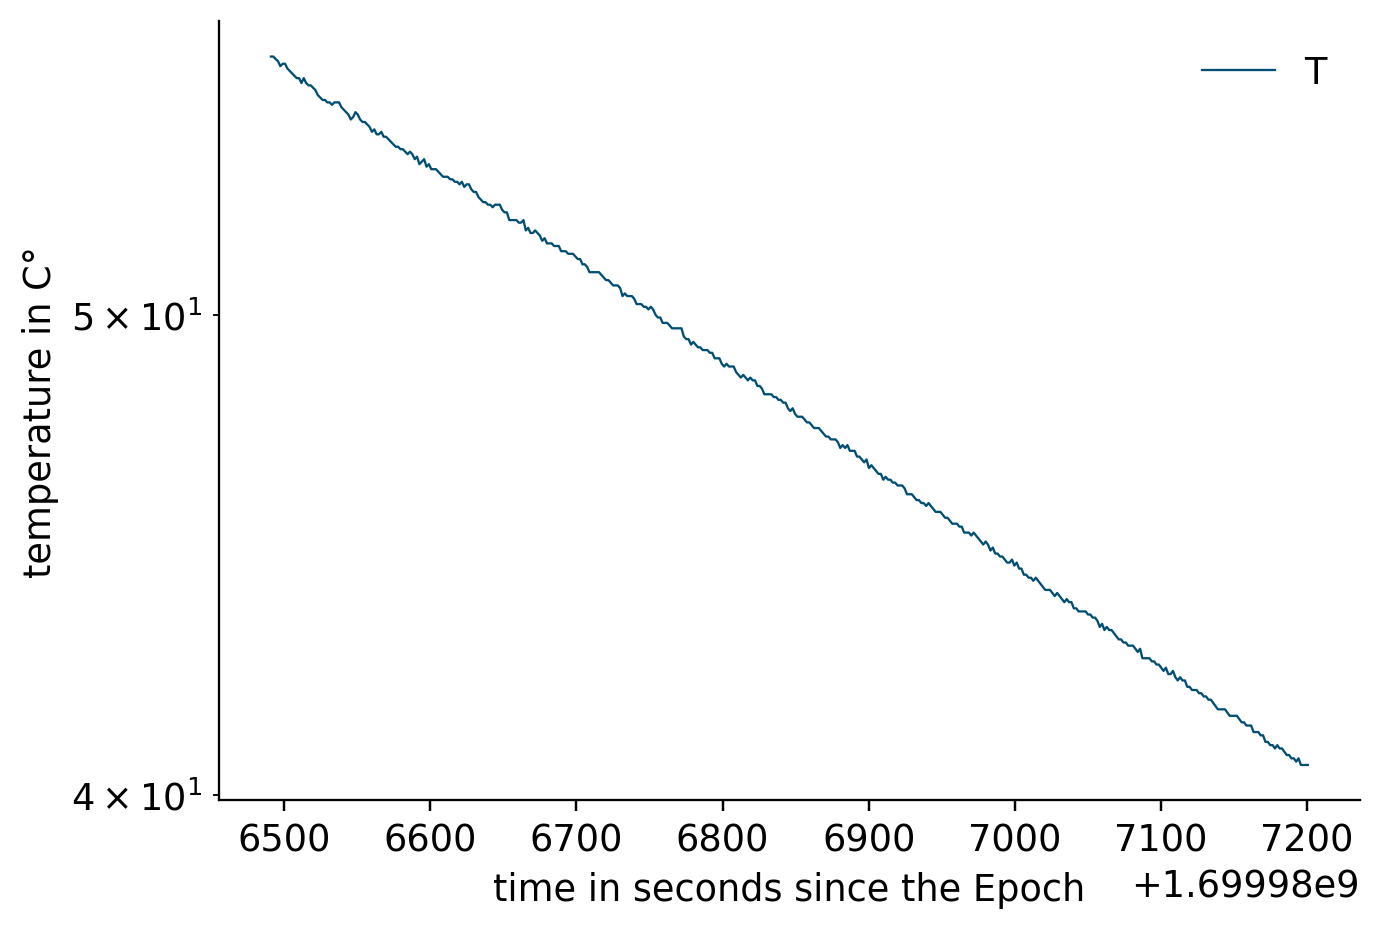

In [9]:
# TODO: Use the temperature and time data for plotting

uuid_1_data = dataset_newton['1ee822cb-e29f-6a7f-8e1f-ecc9f433cf9e']
time_data_1 = uuid_1_data['time']
temperature_data_1 = uuid_1_data['temperature']   

# Zweiter Sensor
uuid_2_data = dataset_newton['1ee822cc-8cfc-68bc-bdcb-5fcdd9fe6243']
time_data_2 = uuid_2_data['time']
temperature_data_2 = uuid_2_data['temperature']   

temp_diff = temperature_data_2 - temperature_data_1 
plt.semilogy(time_data_1, temp_diff)



plt.xlabel('time in seconds since the Epoch')
plt.ylabel('temperature in C°')
plt.legend('Temp. Diff')
plt.show()

# DONE #

#### (iii) Koeffizient in Newtonschem Abkühlungsgesetz
Die `numpy.polyfit` Funktion ist zu verwenden, um den Koeffizienten $K$ zu bestimmen.
$$
T(t) - T_2 = (T_1 - T_2)e^{Kt}
$$
Dabei ist $T(t) - T_2$ der Verlauf der Temperaturdifferenz. Die Anfangstemperatur ist $T_1$, die Endtemperatur ist $T_2$.

In [11]:
# TODO: Determine coefficient in Newtonschen Abkühlungsgesetz
start_temp_2 = temperature_data_2[0]
end_temp_2 = temperature_data_2[-1]

T_1 = start_temp_2
T_2 = end_temp_2

temp_ar = np.array(temperature_data_2)
time_ar = np.array(time_data_2)

koeffizienten = np.polyfit(time_ar,temp_ar,1)

K = koeffizienten[0]



# DONE #

#### (iV) Ergebnis

In [13]:
# TODO: Print result

print(K, 'K/s')
# DONE #

-0.0226024353835783 K/s


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.
Können Sie das Newtonsche Abkühlungsgesetz bestätigen?

Der Transportkoeffizient lautet -0.022. Durch den kleinen negativen Wert bestätigt sich das Newtonsche Abkühlungsgesetz, da das Wasser heißer als die Umgebungstemperatur war. Das System nähert sich also mit einer Änderung von 0.022° Celsius pro Sekunde seinem termodynamischen Gleichgewicht.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Der Versuch bestätigt die Erwartungen.